# My Test Project

In [192]:
import pandas as pd
import numpy as ns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

# Loading our data

In [193]:
df = pd.read_csv('car_prices.csv')

In [194]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [195]:
df.shape

(558837, 16)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [197]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


# Numerical Analysis and Visualisation

In [198]:
df['condition'].describe()

count    547017.000000
mean         30.672365
std          13.402832
min           1.000000
25%          23.000000
50%          35.000000
75%          42.000000
max          49.000000
Name: condition, dtype: float64

In [199]:
df['condition'].median()

35.0

<Axes: >

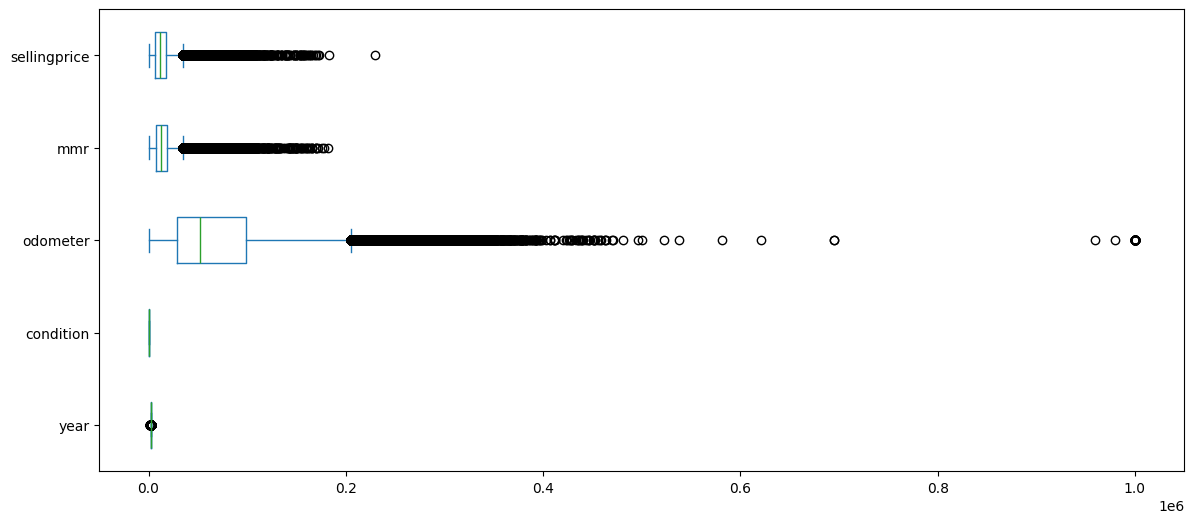

In [200]:
df.plot(kind = 'box', vert = False, figsize = (14,6))

In [201]:
df['year'].median()

2012.0

In [202]:
list_of_target_col = ['odometer', 'sellingprice']

In [203]:
df[list_of_target_col]

,odometer,sellingprice
0,16639.0,21500.0
1,9393.0,21500.0
2,1331.0,30000.0
3,14282.0,27750.0
4,2641.0,67000.0
...,...,...
558832,18255.0,33000.0
558833,54393.0,30800.0
558834,50561.0,34000.0
558835,16658.0,11100.0


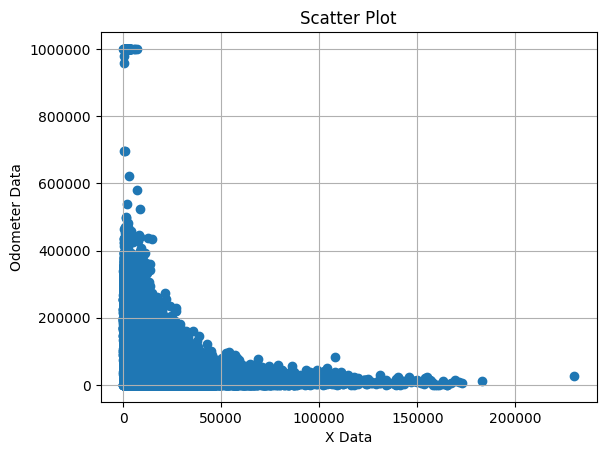

sellingprice    0
odometer        0
dtype: int64


In [204]:
df = df[['sellingprice', 'odometer']]
df = df.dropna()
null_values = df.isnull().sum()
plt.scatter(df['sellingprice'], df['odometer'])
plt.xlabel('X Data')
plt.ylabel('Odometer Data')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()
print(null_values)
X_train, X_test, y_train, y_test = train_test_split(df['sellingprice'], df['odometer'], test_size=0.2)

In [205]:
X_train

518705     6000.0
465246     1250.0
36781     16000.0
453490    14100.0
262148    16800.0
           ...   
518023     9800.0
453586    11300.0
531700    12600.0
345546    14100.0
204458     9500.0
Name: sellingprice, Length: 446984, dtype: float64

In [206]:
y_train

518705     77441.0
465246     89787.0
36781      32958.0
453490     34219.0
262148     13684.0
            ...   
518023     89176.0
453586     32807.0
531700     32379.0
345546     17253.0
204458    125946.0
Name: odometer, Length: 446984, dtype: float64

In [207]:
X_test

178784     8100.0
217359    16400.0
168991     4100.0
494682    16250.0
164285    30500.0
           ...   
188849    73000.0
397505     8000.0
400892     2900.0
274440     8500.0
128430     4000.0
Name: sellingprice, Length: 111747, dtype: float64

In [208]:
model = KNeighborsClassifier()

In [209]:
model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

C:\Users\siddharth.sp\Desktop\Learn2Live\data science\data analytics\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [210]:
pred = model.predict(X_test.values.reshape(-1,1))

In [211]:
model.score(X_test.values.reshape(-1,1),pred)

1.0

In [214]:
model.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1, 1))

0.00024161722462347982

In [190]:
selling_price = 45000
model.predict([[selling_price]])

array([11354.])

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
